In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random

In [44]:
from ast import literal_eval

In [45]:
from scipy.fft import fft, fftfreq, ifft, rfft, rfftfreq, irfft

In [46]:
# загрузим датасет

In [47]:
df = pd.read_excel('ds.xlsx')

In [48]:
df

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2
...,...,...,...,...,...,...,...
31378,d71f9db8-f93b-4cab-89ce-5d52a6627034,2,3,4,"[-35, -20, -3, 20, 37, 53, 65, 83, 93, 21, -80...","[241, 240, 244, 242, 248, 247, 239, 217, 203, ...",1
31379,dc61b9b4-2a5d-4a4e-bbbf-ffe039a5aee9,0,1,5,"[-550, -540, -510, -450, -350, -262, -161, -59...","[-1060, -1055, -1038, -1003, -940, -881, -812,...",1
31380,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[98, 95, 126, 206, 207, 62, -78, -83, -7, 132,...","[-203, -203, -211, -241, -247, -192, -123, -10...",2
31381,90b19f5e-5be0-4f38-a0e3-06482573effe,0,1,9,"[-365, -264, -184, -58, 102, 263, 419, 598, 29...","[-10, 40, 87, 180, 304, 431, 558, 706, 483, 14...",1


In [49]:
df.groupby(by=['Filename']).count() # сгруппируем данные по людям

,Test_index,Presentation,Question,Data,Data_2,Class_label
Filename,,,,,,
00b38188-82ee-4f1d-9661-485338815751,77,77,77,77,77,77
02a1eb88-b6b1-49db-975d-ea2c0edfdd43,100,100,100,100,100,100
03b6ee5c-4574-4023-8123-28582a89006e,77,77,77,77,77,77
03da08b1-290a-40ba-be04-b329ae9853a1,81,81,81,81,81,81
0414f7a3-8ca7-42f4-a598-55adc1bbc84f,7,7,7,7,7,7
...,...,...,...,...,...,...
fcbe8631-e21c-41d6-975f-6de80d663bcf,86,86,86,86,86,86
fdac1a9b-e4a5-4912-8135-8d1b0916424f,74,74,74,74,74,74
fe533f7c-9019-4b06-885d-c1a0bdd8f5d6,114,114,114,114,114,114


In [50]:
# есть люди, по которым было задано мало вопорсов - их можно исключить

In [51]:
df.sort_values(by = ['Data_2']) # в данных присутвуют пустые значения (в Data_2) - такие записи можно будет убрать

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
28117,b496add5-78ad-469a-8c79-70f49bd560fb,0,3,11,"[177, 211, 186, -50, -119, -68, -7, 27, 33, 44...","[-1, -1, -1, -4, -4, -3, -3, -3, -2, -3, -2, -...",1
17165,e227dbb0-a207-4ee7-b011-038526a2b3a3,0,2,4,"[155, 111, 52, -9, -79, -176, -271, -346, -457...","[-1, -10, -26, -35, -23, 11, 50, 78, 109, 130,...",1
28958,8579215b-ea02-4ca8-a364-9e0d4efbfc05,0,3,10,"[-28, -12, 4, -7, -74, -170, -215, -213, -184,...","[-1, -11, -19, -5, 39, 93, 114, 110, 91, 76, 6...",1
20457,6ad83bda-6f0c-4114-9f73-f9b27ea3d369,0,1,6,"[455, 424, 369, 335, 324, 317, 311, 311, 330, ...","[-1, -12, 39, 239, 386, 405, 392, 371, 350, 29...",1
7557,8f43a714-1fc4-4f27-915a-c51d2dae5921,1,1,2,"[-327, -221, -94, -26, -28, -67, -109, -140, -...","[-1, -25, -41, -44, -43, -39, -37, -34, -24, -...",0
...,...,...,...,...,...,...,...
2554,34539792-d79a-4352-bf69-9535e1c18574,1,3,7,"[8, 44, 92, 128, 148, 108, -4, -124, -188, -18...",[],1
13639,05a24f73-948b-436a-ab80-7b08751491e7,3,3,6,"[-60, 12, 24, 52, 72, -20, -92, -20, 4, 32, 76...",[],0
26200,34539792-d79a-4352-bf69-9535e1c18574,1,1,8,"[52, 88, 132, 164, 124, 24, -92, -160, -152, -...",[],1
26151,f7fb0221-5ae4-487c-b4cf-3b91f5def002,0,3,3,"[236, 280, 300, 260, 156, 56, 24, 40, 64, 88, ...",[],1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31383 entries, 0 to 31382
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Filename      31383 non-null  object
 1   Test_index    31383 non-null  int64 
 2   Presentation  31383 non-null  int64 
 3   Question      31383 non-null  int64 
 4   Data          31383 non-null  object
 5   Data_2        31383 non-null  object
 6   Class_label   31383 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.7+ MB


In [53]:
# числовые ряды в Data и Data_2 нужно будет преобразовать в массив чисел

In [54]:
# возьмем данные по конкретному человеку

In [55]:
df[df['Filename'] == '00b38188-82ee-4f1d-9661-485338815751']

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2
95,00b38188-82ee-4f1d-9661-485338815751,1,2,2,"[73, 18, 7, 20, 40, 48, 43, 53, 70, 90, 106, 1...","[-1098, -1104, -1104, -1097, -1090, -1085, -10...",1
484,00b38188-82ee-4f1d-9661-485338815751,0,3,6,"[29, 56, 69, 55, -11, -96, -109, -87, -56, -45...","[156, 191, 204, 157, 37, -81, -70, -11, 38, 34...",1
1288,00b38188-82ee-4f1d-9661-485338815751,1,3,2,"[-7, 5, 20, 42, 62, 75, 85, 100, 98, 61, 6, -1...","[-1030, -1036, -1044, -1036, -1023, -1016, -10...",2
2146,00b38188-82ee-4f1d-9661-485338815751,3,3,2,"[-6, -35, -35, -16, 33, 72, 91, 110, 115, 45, ...","[-841, -895, -869, -808, -703, -633, -601, -57...",1
...,...,...,...,...,...,...,...
29365,00b38188-82ee-4f1d-9661-485338815751,3,2,6,"[247, 241, 222, 216, 226, 251, 270, 296, 313, ...","[-762, -774, -792, -791, -774, -745, -724, -70...",2
29654,00b38188-82ee-4f1d-9661-485338815751,1,3,0,"[-26, -12, -7, -6, -3, 8, 25, 38, 51, 63, 76, ...","[-1038, -1038, -1038, -1037, -1034, -1034, -10...",1
29998,00b38188-82ee-4f1d-9661-485338815751,3,2,11,"[-35, -14, 21, 18, -7, 1, 17, 42, 58, 77, 88, ...","[-1049, -998, -951, -963, -991, -973, -948, -9...",1
30642,00b38188-82ee-4f1d-9661-485338815751,3,3,3,"[-269, -272, -234, -206, -221, -248, -254, -21...","[-1070, -1001, -894, -850, -904, -963, -940, -...",1


In [56]:
df.iloc[18026] # возьмем данные по конкретному вопросу

Filename                     00b38188-82ee-4f1d-9661-485338815751
Test_index                                                      0
Presentation                                                    2
Question                                                        0
Data            [-132, -108, -80, -51, -33, -19, -63, -152, -2...
Data_2          [-106, -72, -34, 1, 25, 27, -65, -203, -272, -...
Class_label                                                     1
Name: 18026, dtype: object

In [57]:
# преобразование в массив чисел
y1 = literal_eval(df.iloc[18026].Data)
y2 = literal_eval(df.iloc[18026].Data_2)

In [58]:
len(y1)

240

In [59]:
len(y2)

240

In [60]:
x = [i for i in range(len(y1))]

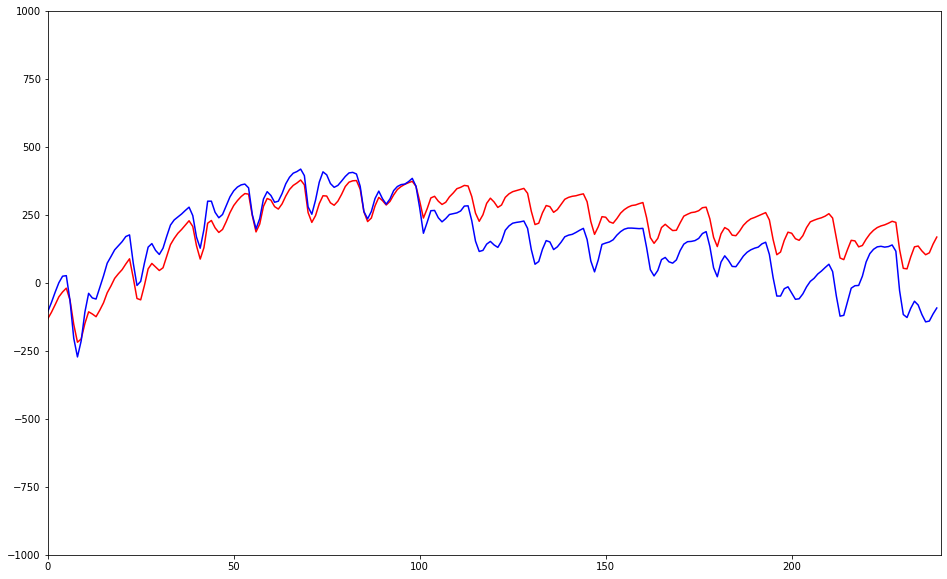

In [61]:
# посмотрим на графике, что представляют собой числовые ряды
plt.figure(figsize=(16,10))

plt.plot(x, y1, color='red')
plt.plot(x, y2, color='blue')

plt.ylim(-1000, 1000)
plt.xlim(0, len(x))

plt.show()

In [62]:
# преобразуем данные в числовые массивы во всем датасете

In [63]:
df['Data1_int'] = df.apply(lambda row: literal_eval(row['Data']), axis = 1)

In [64]:
df['Data2_int'] = df.apply(lambda row: literal_eval(row['Data_2']), axis = 1)

In [65]:
df

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label,Data1_int,Data2_int
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589..."
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ..."
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ..."
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10..."
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79..."
...,...,...,...,...,...,...,...,...,...
31378,d71f9db8-f93b-4cab-89ce-5d52a6627034,2,3,4,"[-35, -20, -3, 20, 37, 53, 65, 83, 93, 21, -80...","[241, 240, 244, 242, 248, 247, 239, 217, 203, ...",1,"[-35, -20, -3, 20, 37, 53, 65, 83, 93, 21, -80...","[241, 240, 244, 242, 248, 247, 239, 217, 203, ..."
31379,dc61b9b4-2a5d-4a4e-bbbf-ffe039a5aee9,0,1,5,"[-550, -540, -510, -450, -350, -262, -161, -59...","[-1060, -1055, -1038, -1003, -940, -881, -812,...",1,"[-550, -540, -510, -450, -350, -262, -161, -59...","[-1060, -1055, -1038, -1003, -940, -881, -812,..."
31380,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[98, 95, 126, 206, 207, 62, -78, -83, -7, 132,...","[-203, -203, -211, -241, -247, -192, -123, -10...",2,"[98, 95, 126, 206, 207, 62, -78, -83, -7, 132,...","[-203, -203, -211, -241, -247, -192, -123, -10..."
31381,90b19f5e-5be0-4f38-a0e3-06482573effe,0,1,9,"[-365, -264, -184, -58, 102, 263, 419, 598, 29...","[-10, 40, 87, 180, 304, 431, 558, 706, 483, 14...",1,"[-365, -264, -184, -58, 102, 263, 419, 598, 29...","[-10, 40, 87, 180, 304, 431, 558, 706, 483, 14..."


In [66]:
# проведем анализ для конкретного человека

In [67]:
df[df['Filename'] == '00b38188-82ee-4f1d-9661-485338815751']

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label,Data1_int,Data2_int
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79..."
95,00b38188-82ee-4f1d-9661-485338815751,1,2,2,"[73, 18, 7, 20, 40, 48, 43, 53, 70, 90, 106, 1...","[-1098, -1104, -1104, -1097, -1090, -1085, -10...",1,"[73, 18, 7, 20, 40, 48, 43, 53, 70, 90, 106, 1...","[-1098, -1104, -1104, -1097, -1090, -1085, -10..."
484,00b38188-82ee-4f1d-9661-485338815751,0,3,6,"[29, 56, 69, 55, -11, -96, -109, -87, -56, -45...","[156, 191, 204, 157, 37, -81, -70, -11, 38, 34...",1,"[29, 56, 69, 55, -11, -96, -109, -87, -56, -45...","[156, 191, 204, 157, 37, -81, -70, -11, 38, 34..."
1288,00b38188-82ee-4f1d-9661-485338815751,1,3,2,"[-7, 5, 20, 42, 62, 75, 85, 100, 98, 61, 6, -1...","[-1030, -1036, -1044, -1036, -1023, -1016, -10...",2,"[-7, 5, 20, 42, 62, 75, 85, 100, 98, 61, 6, -1...","[-1030, -1036, -1044, -1036, -1023, -1016, -10..."
2146,00b38188-82ee-4f1d-9661-485338815751,3,3,2,"[-6, -35, -35, -16, 33, 72, 91, 110, 115, 45, ...","[-841, -895, -869, -808, -703, -633, -601, -57...",1,"[-6, -35, -35, -16, 33, 72, 91, 110, 115, 45, ...","[-841, -895, -869, -808, -703, -633, -601, -57..."
...,...,...,...,...,...,...,...,...,...
29365,00b38188-82ee-4f1d-9661-485338815751,3,2,6,"[247, 241, 222, 216, 226, 251, 270, 296, 313, ...","[-762, -774, -792, -791, -774, -745, -724, -70...",2,"[247, 241, 222, 216, 226, 251, 270, 296, 313, ...","[-762, -774, -792, -791, -774, -745, -724, -70..."
29654,00b38188-82ee-4f1d-9661-485338815751,1,3,0,"[-26, -12, -7, -6, -3, 8, 25, 38, 51, 63, 76, ...","[-1038, -1038, -1038, -1037, -1034, -1034, -10...",1,"[-26, -12, -7, -6, -3, 8, 25, 38, 51, 63, 76, ...","[-1038, -1038, -1038, -1037, -1034, -1034, -10..."
29998,00b38188-82ee-4f1d-9661-485338815751,3,2,11,"[-35, -14, 21, 18, -7, 1, 17, 42, 58, 77, 88, ...","[-1049, -998, -951, -963, -991, -973, -948, -9...",1,"[-35, -14, 21, 18, -7, 1, 17, 42, 58, 77, 88, ...","[-1049, -998, -951, -963, -991, -973, -948, -9..."
30642,00b38188-82ee-4f1d-9661-485338815751,3,3,3,"[-269, -272, -234, -206, -221, -248, -254, -21...","[-1070, -1001, -894, -850, -904, -963, -940, -...",1,"[-269, -272, -234, -206, -221, -248, -254, -21...","[-1070, -1001, -894, -850, -904, -963, -940, -..."


In [68]:
# сделаем выборку вопросов только из одного теста одного повторения
df_1 = df[(df['Filename'] == '00b38188-82ee-4f1d-9661-485338815751') &
          (df['Test_index'] == 0) &
          (df['Presentation'] == 2)
         ]
df_1

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label,Data1_int,Data2_int
2787,00b38188-82ee-4f1d-9661-485338815751,0,2,2,"[105, 19, -60, -41, 1, 22, 16, 6, 16, 33, 75, ...","[357, 130, -20, 37, 113, 132, 90, 56, 71, 100,...",1,"[105, 19, -60, -41, 1, 22, 16, 6, 16, 33, 75, ...","[357, 130, -20, 37, 113, 132, 90, 56, 71, 100,..."
5329,00b38188-82ee-4f1d-9661-485338815751,0,2,9,"[-297, -276, -255, -233, -221, -274, -433, -48...","[-290, -245, -201, -149, -141, -314, -654, -70...",2,"[-297, -276, -255, -233, -221, -274, -433, -48...","[-290, -245, -201, -149, -141, -314, -654, -70..."
5994,00b38188-82ee-4f1d-9661-485338815751,0,2,11,"[-156, -147, -197, -326, -338, -294, -269, -28...","[-79, -82, -150, -278, -259, -204, -186, -217,...",1,"[-156, -147, -197, -326, -338, -294, -269, -28...","[-79, -82, -150, -278, -259, -204, -186, -217,..."
6325,00b38188-82ee-4f1d-9661-485338815751,0,2,1,"[57, 65, 31, -62, -137, -146, -107, -78, -78, ...","[-158, -147, -196, -303, -375, -379, -335, -30...",2,"[57, 65, 31, -62, -137, -146, -107, -78, -78, ...","[-158, -147, -196, -303, -375, -379, -335, -30..."
8306,00b38188-82ee-4f1d-9661-485338815751,0,2,5,"[253, 189, 185, 226, 264, 270, 254, 252, 277, ...","[163, 53, 70, 155, 212, 204, 161, 163, 210, 24...",2,"[253, 189, 185, 226, 264, 270, 254, 252, 277, ...","[163, 53, 70, 155, 212, 204, 161, 163, 210, 24..."
13717,00b38188-82ee-4f1d-9661-485338815751,0,2,10,"[9, -17, -85, -127, -114, -77, -58, -74, -68, ...","[91, 11, -140, -195, -139, -50, -37, -84, -68,...",1,"[9, -17, -85, -127, -114, -77, -58, -74, -68, ...","[91, 11, -140, -195, -139, -50, -37, -84, -68,..."
17319,00b38188-82ee-4f1d-9661-485338815751,0,2,3,"[45, 66, 90, 103, 2, -145, -151, -108, -71, -7...","[202, 215, 238, 222, -90, -420, -386, -259, -1...",2,"[45, 66, 90, 103, 2, -145, -151, -108, -71, -7...","[202, 215, 238, 222, -90, -420, -386, -259, -1..."
18026,00b38188-82ee-4f1d-9661-485338815751,0,2,0,"[-132, -108, -80, -51, -33, -19, -63, -152, -2...","[-106, -72, -34, 1, 25, 27, -65, -203, -272, -...",1,"[-132, -108, -80, -51, -33, -19, -63, -152, -2...","[-106, -72, -34, 1, 25, 27, -65, -203, -272, -..."
23608,00b38188-82ee-4f1d-9661-485338815751,0,2,7,"[120, 141, 158, 172, 186, 197, 207, 202, 144, ...","[386, 405, 414, 412, 407, 405, 409, 384, 287, ...",1,"[120, 141, 158, 172, 186, 197, 207, 202, 144, ...","[386, 405, 414, 412, 407, 405, 409, 384, 287, ..."
28749,00b38188-82ee-4f1d-9661-485338815751,0,2,8,"[377, 354, 279, 194, 176, 204, 231, 234, 213, ...","[351, 267, 83, -77, -82, -4, 58, 39, -25, -54,...",2,"[377, 354, 279, 194, 176, 204, 231, 234, 213, ...","[351, 267, 83, -77, -82, -4, 58, 39, -25, -54,..."


In [69]:
c = ['lawngreen',  # зеленый - слабый стресс (0)
     'gold',       # желтый  - средний стресс (1)
     'magenta']    # красный - сильный стресс (2)

In [70]:
column_name = 'Data2_int' # проанализируем данные первого датчика
column_name_1 = 'Data1_int' # данные первого датчика
column_name_2 = 'Data2_int' # данные второго датчика

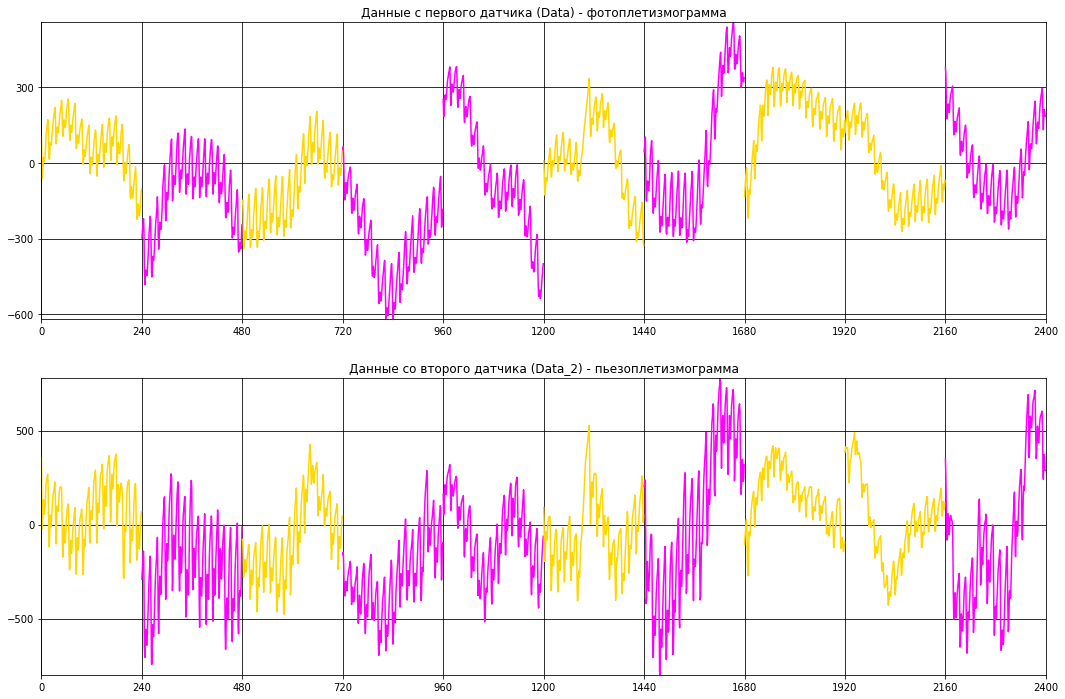

In [71]:
# предтавим на одном графике все реакции на вопросы в одном повторении друг за другом
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

x_max = 0
for i in range(len(df_1)):
    ll = len(df_1.iloc[i][column_name_1])
    x = [(x_max + i) for i in range(ll)]
    ax1.plot(x, df_1.iloc[i][column_name_1], color=c[df_1.iloc[i]['Class_label']])
    x_max += ll
    
df_max = max(df_1.apply(lambda row: max(row[column_name_1]), axis=1))
df_min = min(df_1.apply(lambda row: min(row[column_name_1]), axis=1))

ax1.set_ylim(df_min, df_max)
ax1.set_xlim(0, x_max)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(240))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(int((df_max - df_min)/300)*100))
ax1.grid(which='major', color = 'k')
ax1.set_title('Данные с первого датчика (Data) - фотоплетизмограмма')

x_max = 0
for i in range(len(df_1)):
    ll = len(df_1.iloc[i][column_name_2])
    x = [(x_max + i) for i in range(ll)]
    ax2.plot(x, df_1.iloc[i][column_name_2], color=c[df_1.iloc[i]['Class_label']])
    x_max += ll
    
df_max = max(df_1.apply(lambda row: max(row[column_name_2]), axis=1))
df_min = min(df_1.apply(lambda row: min(row[column_name_2]), axis=1))

ax2.set_ylim(df_min, df_max)
ax2.set_xlim(0, x_max)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(240))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(int((df_max - df_min)/300)*100))
ax2.grid(which='major', color = 'k')
ax2.set_title('Данные со второго датчика (Data_2) - пьезоплетизмограмма')

plt.show()

In [72]:
# нужно как-то дополнительно предобрабоатать предоставленные данные,
# чтобы выявить взаимосвязь между видом графика реакции на вопрос
# и выставленной оценкой уровня стресса

In [73]:
# из задания и пояснения специалистов следует, что анализ реакции на вопрос
# необходимо проводить в рамках одного повторения

In [74]:
# "склеим" в один числовой массив все реакции на вопросы одного повторения
k = len(df_1)
b_1 =[]
b_2 =[]
for i in range(k):
    b_1 += df_1.iloc[i][column_name_1]
    b_2 += df_1.iloc[i][column_name_2]

ll = len(b_1)
xb = [i for i in range(ll)]

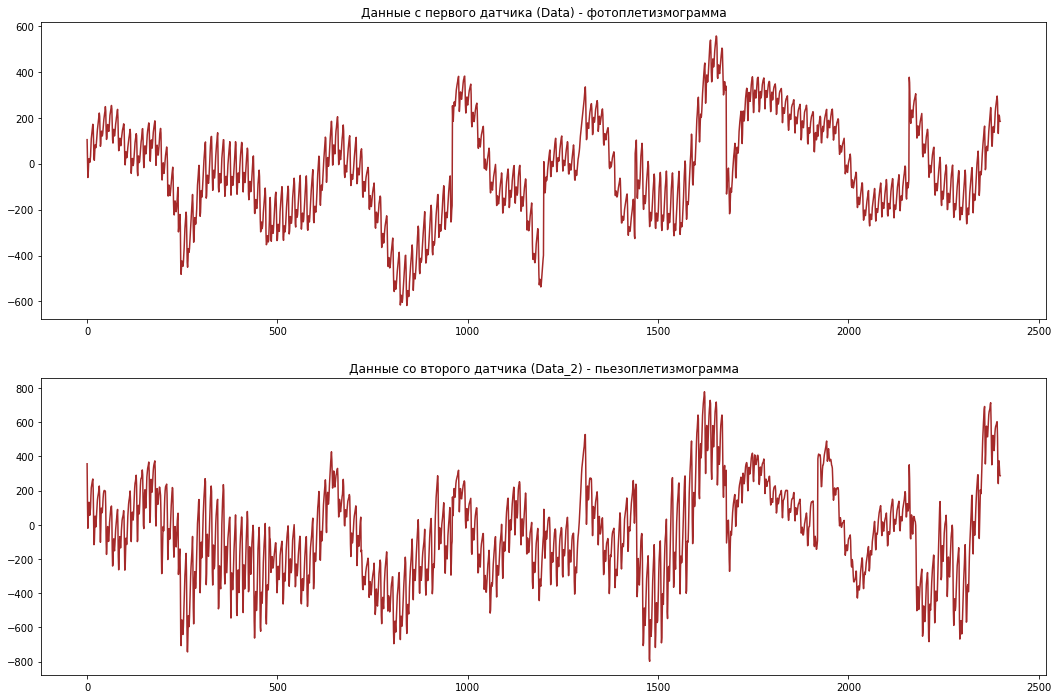

In [75]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xb, b_1, color='brown')  
ax1.set_title('Данные с первого датчика (Data) - фотоплетизмограмма')

ax2.plot(xb, b_2, color='brown')  
ax2.set_title('Данные со второго датчика (Data_2) - пьезоплетизмограмма')

plt.show()

In [76]:
# проведем частотный анализ этого графика

In [77]:
SAMPLE_RATE = 20  # Гц
DURATION = 12 * k  # время для всего повторения, сек

N = SAMPLE_RATE * DURATION

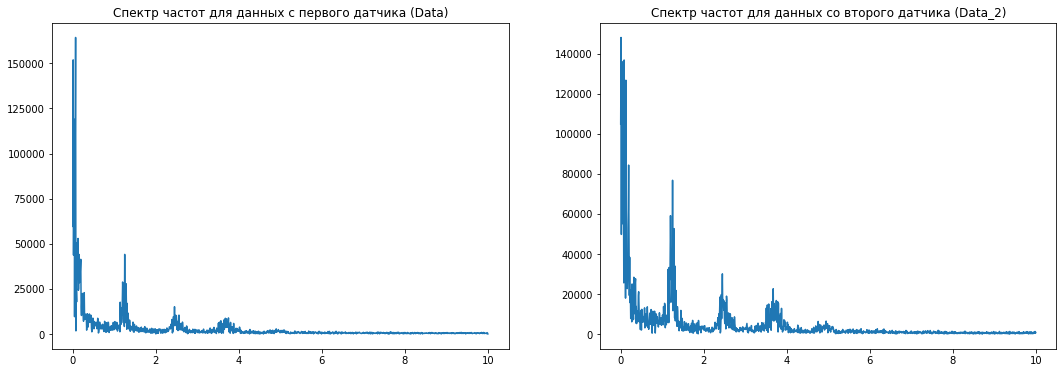

In [78]:
# общая частотную характеристику
yf_1 = rfft(b_1)
yf_2 = rfft(b_2)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xf, np.abs(yf_1))  
ax1.set_title('Спектр частот для данных с первого датчика (Data)')
ax2.plot(xf, np.abs(yf_2))  
ax2.set_title('Спектр частот для данных со второго датчика (Data_2)')

plt.show()

In [79]:
# на частоте = 0 определяется смещение графика по оси Y
yf_1_z = yf_1
yf_1_z[1:] = 0 # обнулим все частоты выше
yf_2_z = yf_2
yf_2_z[1:] = 0 # обнулим все частоты выше

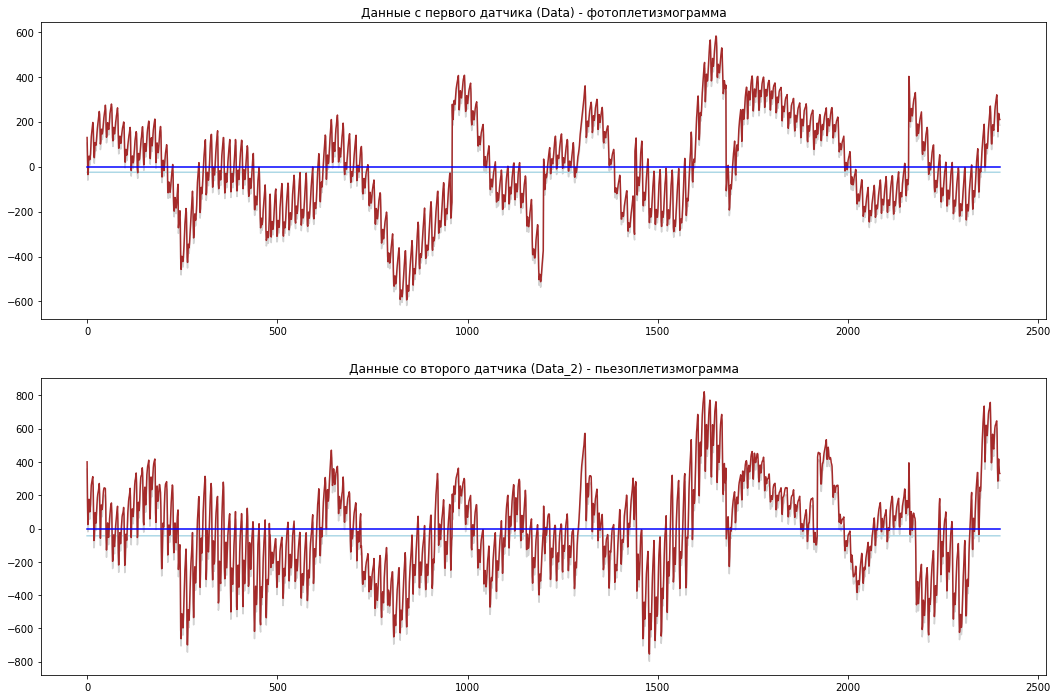

In [80]:
# уберем смещение графика по оси Y
b_1_z = irfft(yf_1_z)
b_1_new = b_1 - b_1_z

b_2_z = irfft(yf_2_z)
b_2_new = b_2 - b_2_z

fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xb, b_1, color='lightgray')  
ax1.plot(xb, b_1_z, 'lightblue')
ax1.plot(xb, b_1_new, color='brown')  
ax1.plot([0, len(xb)], [0, 0], 'blue')
ax1.set_title('Данные с первого датчика (Data) - фотоплетизмограмма')

ax2.plot(xb, b_2, color='lightgray')  
ax2.plot(xb, b_2_z, 'lightblue')
ax2.plot(xb, b_2_new, color='brown')  
ax2.plot([0, len(xb)], [0, 0], 'blue')
ax2.set_title('Данные со второго датчика (Data_2) - пьезоплетизмограмма')

plt.show()

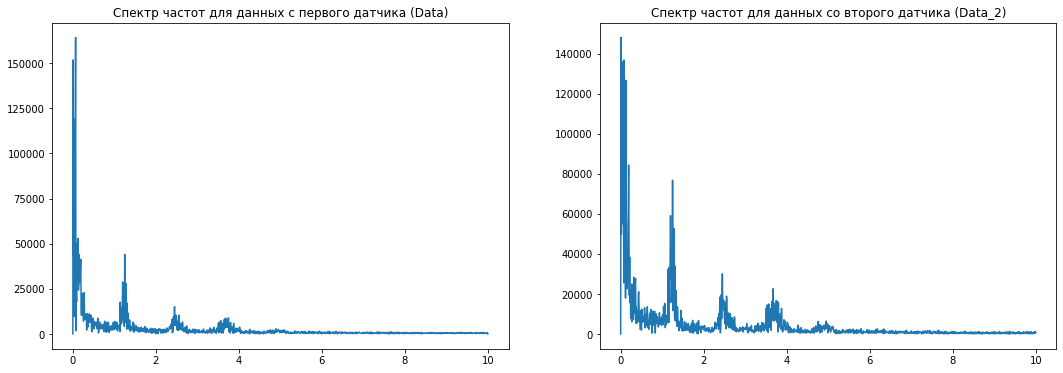

In [81]:
# обновим частотную характеристику
yf_1 = rfft(b_1_new)

yf_2 = rfft(b_2_new)

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xf, np.abs(yf_1))  
ax1.set_title('Спектр частот для данных с первого датчика (Data)')
ax2.plot(xf, np.abs(yf_2))  
ax2.set_title('Спектр частот для данных со второго датчика (Data_2)')

plt.show()

In [82]:
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

In [83]:
target_idx = int(points_per_freq * 1) # самые низкие частоты покажут нам среднюю линию графика

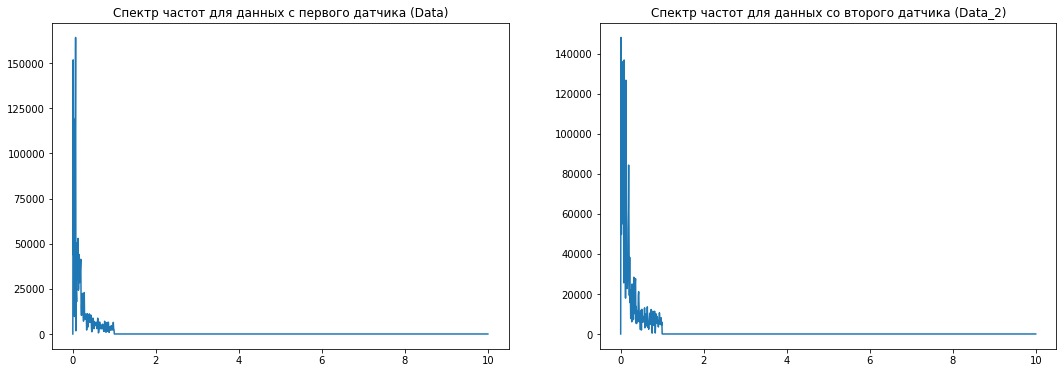

In [84]:
yf_1_cut = yf_1
yf_1_cut[target_idx:] = 0

yf_2_cut = yf_2
yf_2_cut[target_idx:] = 0

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xf, np.abs(yf_1_cut))  
ax1.set_title('Спектр частот для данных с первого датчика (Data)')
ax2.plot(xf, np.abs(yf_2_cut))  
ax2.set_title('Спектр частот для данных со второго датчика (Data_2)')

plt.show()

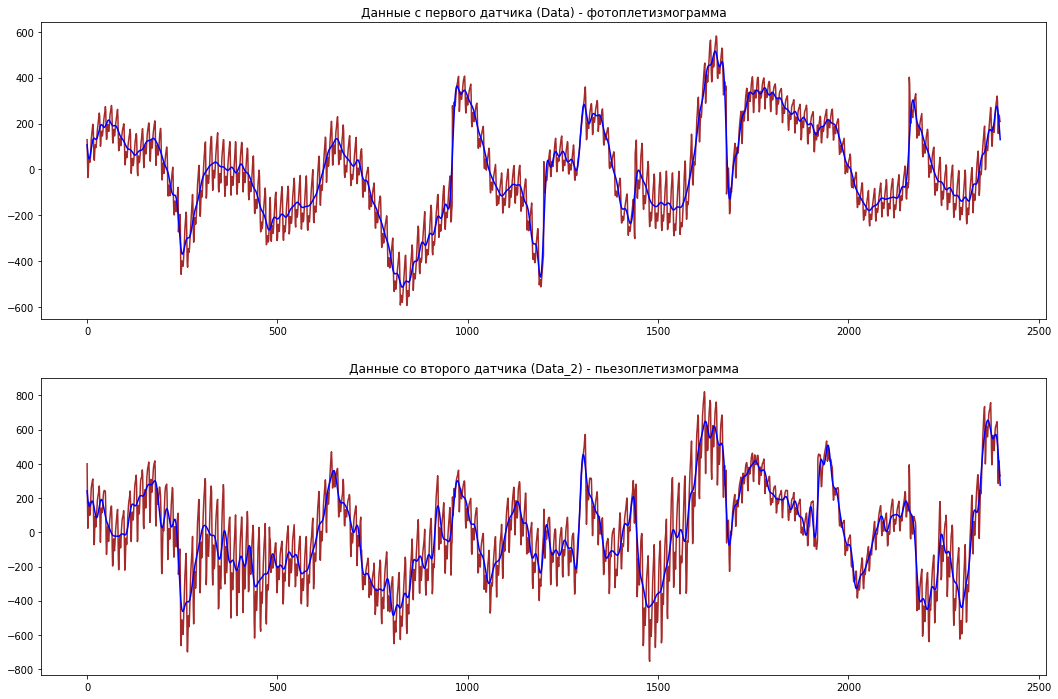

In [85]:
# посмотрим среднюю линию на графике
b_1_0 = irfft(yf_1_cut)

b_2_0 = irfft(yf_2_cut)

fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xb, b_1_new, color='brown')  
ax1.plot(xb, b_1_0, 'blue')
ax1.set_title('Данные с первого датчика (Data) - фотоплетизмограмма')

ax2.plot(xb, b_2_new, color='brown')  
ax2.plot(xb, b_2_0, 'blue')
ax2.set_title('Данные со второго датчика (Data_2) - пьезоплетизмограмма')

plt.show()

In [86]:
# если вычесть среднюю линию из основного графика, то можно оценить амплитуду колебаний датчика
# при этом из условия задачи знаем частота колебаний дачтика состаляет 20Гц

b_1_simple = b_1_new - b_1_0

b_2_simple = b_2_new - b_2_0

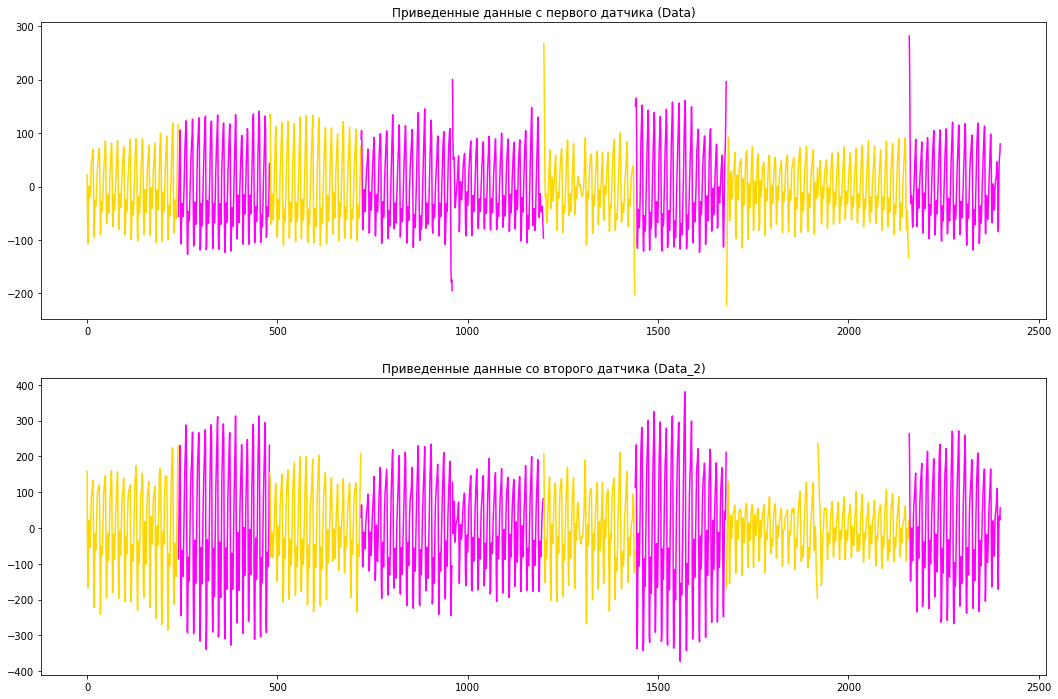

In [87]:
# выведем приведенный график с учетом выставленного уровня стресса
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

x_max = 0
for i in range(len(df_1)):
    ll = len(df_1.iloc[i][column_name_1])
    xx = [(x_max + i) for i in range(ll)]
    ax1.plot(xx, b_1_simple[xx], color=c[df_1.iloc[i]['Class_label']])
    ax2.plot(xx, b_2_simple[xx], color=c[df_1.iloc[i]['Class_label']])
    x_max += ll

ax1.set_title('Приведенные данные с первого датчика (Data)')
ax2.set_title('Приведенные данные со второго датчика (Data_2)')
    
plt.show()    

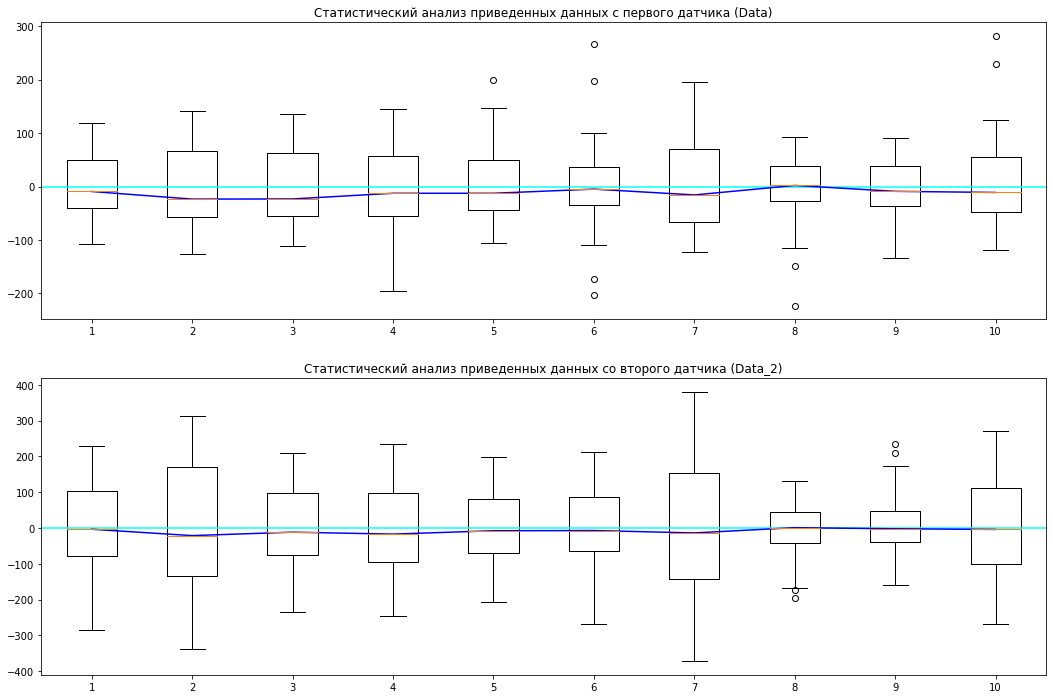

In [88]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

b_1_box = []
b_2_box = []
m_1 = []
m_2 = []
x_max = 0
for i in range(len(df_1)):
    ll = len(df_1.iloc[i][column_name_1])
    xx = [(x_max + i) for i in range(ll)]
    b_1_box.append(b_1_simple[xx])
    m_1.append(np.median(b_1_simple[xx]))
    b_2_box.append(b_2_simple[xx])
    m_2.append(np.median(b_2_simple[xx]))
    x_max += ll

ax1.boxplot(b_1_box)    
ax1.plot([0.5, k+0.5],[0, 0], 'cyan')
ax1.plot([i+1 for i in range(len(m_1))], m_1, 'blue')
ax1.set_title('Статистический анализ приведенных данных с первого датчика (Data)')

ax2.boxplot(b_2_box)    
ax2.plot([0.5, k+0.5],[0, 0], 'cyan')
ax2.plot([i+1 for i in range(len(m_2))], m_2, 'blue')
ax2.set_title('Статистический анализ приведенных данных со второго датчика (Data_2)')

plt.show()

In [89]:
# нормализуем отклонение медианных значений приведенных данных с датчиков для каждого вопроса
# будем относить к группе '2' если значение >= 0.6, к '1' - если >= 0.3 и к '0' - < 0.3 
# можно выбрать другие границы, например: (2/3 и 1/3) или (0.5 и 0.25)

m_1 = list(map(abs, m_1))
m_2 = list(map(abs, m_2))

m_1_max = max(m_1)
m_1_min = min(m_1)
m_1_norm = [0]*len(m_1)
m_2_max = max(m_2)
m_2_min = min(m_2)
m_2_norm = [0]*len(m_2)

for i in range(len(m_1)):
    tmp = (m_1[i]-m_1_min)/(m_1_max-m_1_min)
    m_1_norm[i] = 2 if tmp >= 0.6 else 1 if tmp >= 0.3 else 0   
    tmp = (m_2[i]-m_2_min)/(m_2_max-m_2_min)
    m_2_norm[i] = 2 if tmp >= 0.6 else 1 if tmp >= 0.3 else 0   
    
print(m_1_norm)
print(m_2_norm)

[1, 2, 2, 1, 1, 0, 2, 0, 1, 1]
[0, 2, 1, 2, 1, 1, 2, 0, 0, 0]


In [90]:
# итоговое значение возьмем как максимально из двух датчиков
m = [0]*len(m_1_norm)
for i in range(len(m)):
    m[i] = max(m_1_norm[i], m_2_norm[i])

In [91]:
m

[1, 2, 2, 2, 1, 1, 2, 0, 1, 1]